In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa

from sklearn.mixture import GaussianMixture

import IPython.display as ipd
import os

#### Importing _.wav_ file audio and visualizing mfcc, first order and second order mfcc

In [2]:
ipd.Audio("Speaker_data/Voice_Samples_Training/Abhay-001/Abhay_1.wav")

In [3]:
signal, sr = librosa.load("Speaker_data/Voice_Samples_Training/Abhay-001/Abhay_1.wav")
signal.shape

(117700,)

In [4]:
mfcc = librosa.feature.mfcc(y=signal, n_mfcc=1, sr=sr)
mfcc = mfcc.reshape(mfcc.shape[1],)
mfcc.shape

(230,)

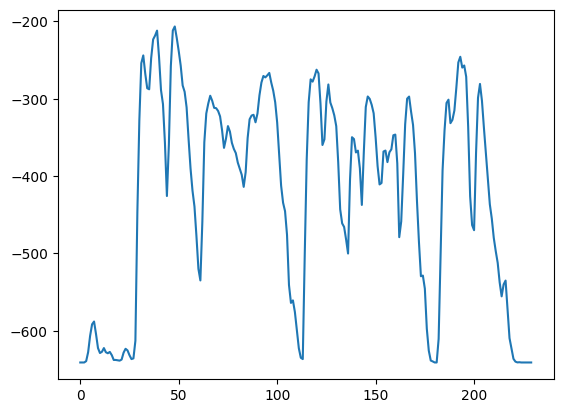

In [5]:
plt.plot([i for i in range(230)], mfcc)

In [6]:
delta_mfcc = librosa.feature.delta(mfcc)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

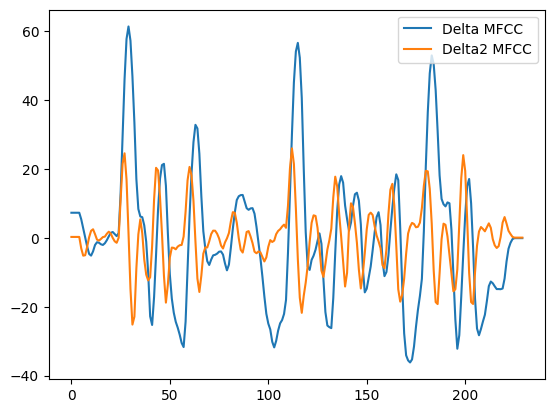

In [7]:
plt.plot([i for i in range(230)], delta_mfcc, label = "Delta MFCC")
plt.plot([i for i in range(230)], delta2_mfcc, label = "Delta2 MFCC")
plt.legend()

#### Extracting audio Sequentially from the folder

In [8]:
def extract_feature(file_path, n):
    y, sr = librosa.load(file_path)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n).T, axis=0)
    return mfcc

In [9]:
d = {}
directory = "Speaker_data/Voice_Samples_Training/"

for nm in os.listdir(directory):
    name = nm
    pth = directory+nm
    d[name] = []
    for audio in os.listdir(pth):
        audio_pth = pth +"/"+ audio
        d[name].append(extract_feature(audio_pth, 10))
    

In [10]:
l=[]
ll=[]
lll=[]
name_to_number={}
number_to_name={}
cnt=0
for i in d:
    name_to_number[i] = cnt
    number_to_name[cnt] = i
    for j in d[i]:
        l.append(j.tolist())
        ll.append(i)
        lll.append(cnt)
    cnt+=1
        

In [11]:
df = pd.DataFrame(l, columns = [str(i) for i in range(10)])
# df["Speaker"] = lll

<Axes: >

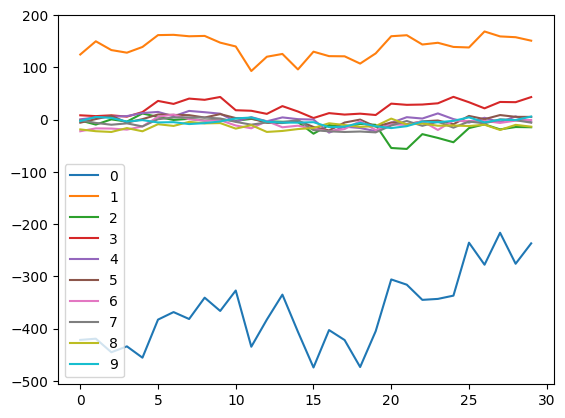

In [12]:
df.plot()

#### Fitting GMM from SKlearn library

In [13]:
gmm = GaussianMixture(n_components=6)
gmm.fit(df)

GaussianMixture(n_components=6)

##### Testing model accuracy from few Audio samples from _Testing_Audio_ folder

In [14]:
test_l = ["Speaker_data/Testing_Audio/Abhay-P1/","Speaker_data/Testing_Audio/Vaibhav-P6/", "Speaker_data/Testing_Audio/ShivamY-P5/"]

d_test = {}
for i in test_l:
    d_test[i]=[]
    for audio in os.listdir(i):
        audio_pth = i + audio        
        d_test[i].append(extract_feature(audio_pth, 10))
    

# y, sr = librosa.load(test1)
# mfcc = np.mean(librosa.feature.mfcc(y=y, sr = sr, n_mfcc = 10).T, axis=0)

In [15]:
l=[]
ll=[]
lll=[]
name_to_number={}
number_to_name={}
cnt=0
for i in d_test:
    name_to_number[i] = cnt
    number_to_name[cnt] = i
    for j in d_test[i]:
        l.append(j.tolist())
        ll.append(i)
        lll.append(cnt)
    cnt+=1
        

In [16]:
df_test = pd.DataFrame(l, columns = [str(i) for i in range(10)])

In [17]:
gmm.predict(df_test)

array([4, 4, 4, 5, 5, 4, 1, 1, 2, 1, 1, 1, 5, 5, 5, 5, 5, 5], dtype=int64)

In [18]:
ll    ##  only one misclassification

['Speaker_data/Testing_Audio/Abhay-P1/',
 'Speaker_data/Testing_Audio/Abhay-P1/',
 'Speaker_data/Testing_Audio/Abhay-P1/',
 'Speaker_data/Testing_Audio/Abhay-P1/',
 'Speaker_data/Testing_Audio/Abhay-P1/',
 'Speaker_data/Testing_Audio/Abhay-P1/',
 'Speaker_data/Testing_Audio/Vaibhav-P6/',
 'Speaker_data/Testing_Audio/Vaibhav-P6/',
 'Speaker_data/Testing_Audio/Vaibhav-P6/',
 'Speaker_data/Testing_Audio/Vaibhav-P6/',
 'Speaker_data/Testing_Audio/Vaibhav-P6/',
 'Speaker_data/Testing_Audio/Vaibhav-P6/',
 'Speaker_data/Testing_Audio/ShivamY-P5/',
 'Speaker_data/Testing_Audio/ShivamY-P5/',
 'Speaker_data/Testing_Audio/ShivamY-P5/',
 'Speaker_data/Testing_Audio/ShivamY-P5/',
 'Speaker_data/Testing_Audio/ShivamY-P5/',
 'Speaker_data/Testing_Audio/ShivamY-P5/']

#### Fitting GMM with more number of features, taking _n_features_ = 50

In [19]:
nn=50
d = {}
directory = "Speaker_data/Voice_Samples_Training/"

for nm in os.listdir(directory):
    name = nm
    pth = directory+nm
    d[name] = []
    for audio in os.listdir(pth):
        audio_pth = pth +"/"+ audio
        d[name].append(extract_feature(audio_pth, nn))
    

In [20]:
l=[]
ll=[]
lll=[]
name_to_number={}
number_to_name={}
cnt=0
for i in d:
    name_to_number[i] = cnt
    number_to_name[cnt] = i
    for j in d[i]:
        l.append(j.tolist())
        ll.append(i)
        lll.append(cnt)
    cnt+=1
        

In [21]:
df = pd.DataFrame(l, columns = [str(i) for i in range(nn)])
# df["Speaker"] = lll

In [22]:
gmm = GaussianMixture(n_components=6)
gmm.fit(df)

GaussianMixture(n_components=6)

In [23]:
test_l = ["Speaker_data/Testing_Audio/Abhay-P1/","Speaker_data/Testing_Audio/Vaibhav-P6/", "Speaker_data/Testing_Audio/ShivamY-P5/"]

d_test = {}
for i in test_l:
    d_test[i]=[]
    for audio in os.listdir(i):
        audio_pth = i + audio        
        d_test[i].append(extract_feature(audio_pth, nn))
    

# y, sr = librosa.load(test1)
# mfcc = np.mean(librosa.feature.mfcc(y=y, sr = sr, n_mfcc = 10).T, axis=0)

In [24]:
l=[]
ll=[]
lll=[]
name_to_number={}
number_to_name={}
cnt=0
for i in d_test:
    name_to_number[i] = cnt
    number_to_name[cnt] = i
    for j in d_test[i]:
        l.append(j.tolist())
        ll.append(i)
        lll.append(cnt)
    cnt+=1
        

In [25]:
df_test = pd.DataFrame(l, columns = [str(i) for i in range(nn)])

In [26]:
gmm.predict(df_test)

array([3, 3, 3, 1, 1, 3, 2, 2, 5, 5, 2, 4, 1, 1, 1, 1, 1, 1], dtype=int64)

In [27]:
ll    ##  2 misclassification

['Speaker_data/Testing_Audio/Abhay-P1/',
 'Speaker_data/Testing_Audio/Abhay-P1/',
 'Speaker_data/Testing_Audio/Abhay-P1/',
 'Speaker_data/Testing_Audio/Abhay-P1/',
 'Speaker_data/Testing_Audio/Abhay-P1/',
 'Speaker_data/Testing_Audio/Abhay-P1/',
 'Speaker_data/Testing_Audio/Vaibhav-P6/',
 'Speaker_data/Testing_Audio/Vaibhav-P6/',
 'Speaker_data/Testing_Audio/Vaibhav-P6/',
 'Speaker_data/Testing_Audio/Vaibhav-P6/',
 'Speaker_data/Testing_Audio/Vaibhav-P6/',
 'Speaker_data/Testing_Audio/Vaibhav-P6/',
 'Speaker_data/Testing_Audio/ShivamY-P5/',
 'Speaker_data/Testing_Audio/ShivamY-P5/',
 'Speaker_data/Testing_Audio/ShivamY-P5/',
 'Speaker_data/Testing_Audio/ShivamY-P5/',
 'Speaker_data/Testing_Audio/ShivamY-P5/',
 'Speaker_data/Testing_Audio/ShivamY-P5/']